In [72]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sys.path.append("../")

from lib.utils import *
from lib.Transformer import OptimalTransport

In [73]:
n_s = 100
n_t = 30


In [74]:
source = np.empty((n_s,2))
split_s = int(0.5*n_s)
split_mask_s = np.zeros(n_s,dtype=bool)
split_mask_s[:split_s] = True
n_split_mask_s = np.logical_not(split_mask_s)
source[:split_s,0] = np.random.normal(4, 0.25, split_s)
source[:split_s,1] = np.random.normal(4, 0.25, split_s)
source[split_s:,0] = np.random.normal(3, 0.5, n_s-split_s)
source[split_s:,1] = np.random.normal(6, 0.25, n_s-split_s)

target = np.empty((n_t,2))
split_t = int(0.5*n_t)
split_mask_t = np.zeros(n_t,dtype=bool)
split_mask_t[:split_t] = True
n_split_mask_t = np.logical_not(split_mask_t)
target[:split_t,0] = np.random.normal(5, 0.25, split_t)
target[:split_t,1] = np.random.normal(3.75, 0.25, split_t)
target[split_t:,0] = np.random.normal(4.5, 0.25, n_t-split_t)
target[split_t:,1] = np.random.normal(5.25, 0.35, n_t-split_t)

([], [])

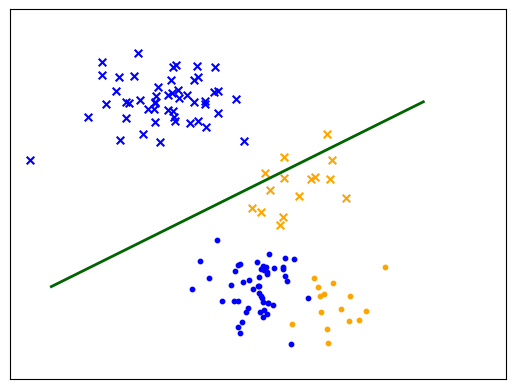

In [92]:
ms_x = 30
ms_o = 10

lw = 2

line1_y0 = 4
line1_x0 = 1.5
line1_y1 = 6
line1_x1 = 6


s0 = plt.scatter(source[split_mask_s,0], source[split_mask_s,1],ms_o,marker='o',c='blue')
s1 = plt.scatter(source[n_split_mask_s,0], source[n_split_mask_s,1],ms_x,marker='x',c='blue')
t0 = plt.scatter(target[split_mask_t,0], target[split_mask_t,1],ms_o,marker='o',color='orange')
t1 = plt.scatter(target[n_split_mask_t,0], target[n_split_mask_t,1],ms_x,marker='x',c='orange')
plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='darkgreen', lw=lw)
plt.xlim(1, 7)
plt.ylim(3, 7)
plt.xticks([])
plt.yticks([])
# plt.title('Intial Data')
# plt.legend((s0, s1, t0, t1),
#            ('source, 0', 'source, 1','target, 0', 'target, 1',),
#            scatterpoints=1,
#            loc='lower right',
#            ncol=2,
#            fontsize=10)

In [88]:
transporter = OptimalTransport(ot_lambda=0.0005)
S_trans = transporter.transport(source,target,costType='l2')

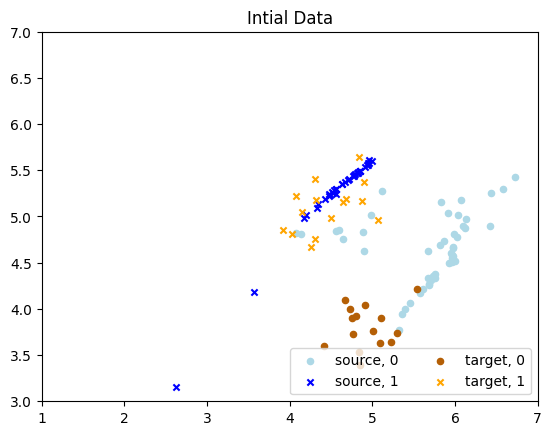

In [89]:
ms_x = 20
ms_o = 20
s0 = plt.scatter(S_trans[split_mask_s,0], S_trans[split_mask_s,1],ms_x,marker='o',c='lightblue')
s1 = plt.scatter(S_trans[n_split_mask_s,0], S_trans[n_split_mask_s,1],ms_x,marker='x',c='blue')
t0 = plt.scatter(target[split_mask_t,0], target[split_mask_t,1],ms_o,marker='o',color='#b45f06')
t1 = plt.scatter(target[n_split_mask_t,0], target[n_split_mask_t,1],ms_o,marker='x',c='orange')
plt.xlim(1, 7)
plt.ylim(3, 7)
plt.title('Intial Data')
plt.legend((s0, s1, t0, t1),
           ('source, 0', 'source, 1','target, 0', 'target, 1',),
           scatterpoints=1,
           loc='lower right',
           ncol=2,
           fontsize=10)